# Importing Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data

In [4]:
df = pd.read_csv("bank-dataset.csv")

# Basic Info About The Data

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Shape of Dataset

In [6]:
df.shape

(41188, 21)

### Unique Columns of Dataset

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Quick Summary of Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##### All the Columns have Non-null values thus, no need to check and fill NA Values

### Checking for Duplciates in Data

In [9]:
df.duplicated().sum()

14

##### Found 14 duplicates, dropping them

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(41174, 21)

##### Now, the net rows left are decresed from 41188 to 41174

### Statistical Summary of Numeric Columns

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41174.0,40.023583,10.420578,17.000,32.000,38.000,47.000,98.000
duration,41174.0,258.323627,259.309058,0.000,102.000,180.000,319.000,4918.000
campaign,41174.0,2.567956,2.770364,1.000,1.000,2.000,3.000,56.000
pdays,41174.0,962.463035,186.941469,0.000,999.000,999.000,999.000,999.000
previous,41174.0,0.173022,0.494975,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41174.0,0.081865,1.570899,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41174.0,93.575713,0.578849,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41174.0,-40.503070,4.627877,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41174.0,3.621231,1.734456,0.634,1.344,4.857,4.961,5.045
nr.employed,41174.0,5167.032805,72.252395,4963.600,5099.100,5191.000,5228.100,5228.100


### Statistical Summary of Non-numeric Columns

In [13]:
df.describe(include = object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41174,41174,41174,41174,41174,41174,41174,41174,41174,41174,41174
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10748,24999,13893,41171,22065,34926,26134,13766,8617,35549,36535


##### Primary Observation from the dataset shows that:
###### 1. From target vriable 'y', about 88.7% Customers did not opted for TD.
###### 2. About 99.9% people contacted were not defaulters for Loan
###### 3. About 53% Customers already having Housing Loan
###### 4. More than half of Customers i.e. 63% of Customers were contacted on Cellular Phone
###### 5. About 61% Customers contacted were married
###### 6. About 85% Customers laready having Personal Loan
###### 7. In Duration Column, there is a huge difference between the 75th percentile value and Maximum Value, thus, there is a possibility of outlier

___

# Exploratory Data Analysis

### Exploring Categorical Variables

In [14]:
# Function for Count Plot of Variables
def countp(x, data):
    plt.figure(figsize = (10,8))
    sns.countplot(x = x, data = data, palette='autumn')

In [15]:
# Function for Count Plot of Variables with Target Variable 'y'
def countp_y(x, data):
    plt.figure(figsize = (10,8))
    sns.countplot(x = x, data = data, hue = 'y', palette = 'Oranges_r')

In [16]:
#Groupby Function
def grpby(x):
    return df.groupby(x)[x].count()

In [17]:
#Groupby Function with Target Variable 'y'
def grpby_y(x):
    return df.groupby([x, 'y'])[x].count()

### Checking the Distribution of Customers for Target Variable 'y'

In [18]:
grpby('y')

y
no     36535
yes     4639
Name: y, dtype: int64

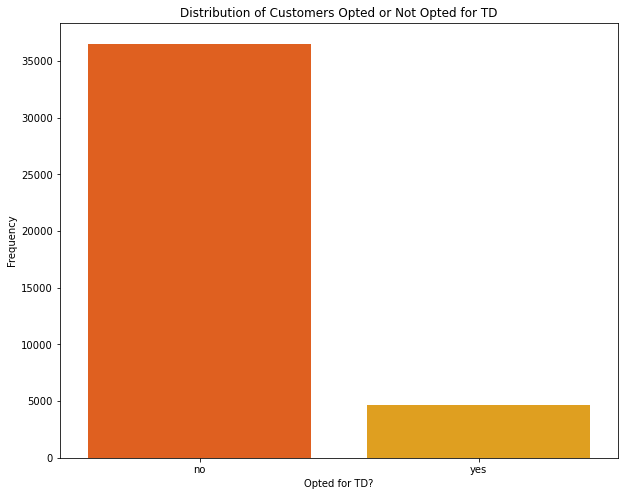

In [19]:
countp('y', df)

plt.xlabel("Opted for TD?")
plt.ylabel("Frequency")
plt.title("Distribution of Customers Opted or Not Opted for TD")

plt.show()

##### As evident, Majority of People (about 88.7% of total customers) did not opted for Term Deposit

### Distribution of 'marital' Column 

In [20]:
grpby('marital')

marital
divorced     4611
married     24999
single      11564
Name: marital, dtype: int64

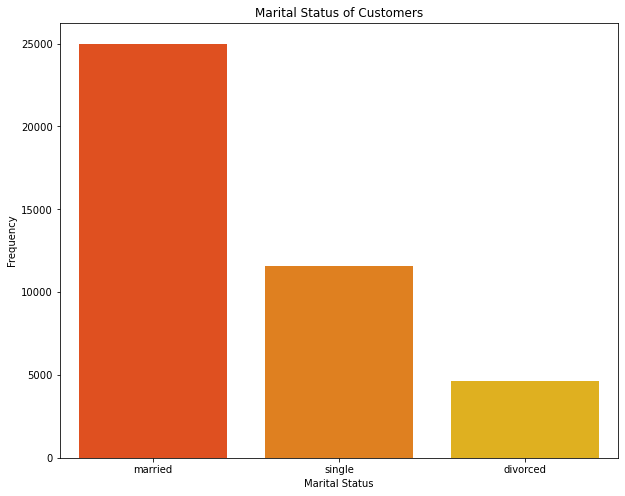

In [21]:
countp('marital', df)

plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.title("Marital Status of Customers")
plt.show()

##### Visualizing the distribution shows the number of Customers for each class of 'marital' Column
##### Out of 41174 Customers, More than half of them are Married, then comes the single followed by divorced Customers down the order.

In [22]:
grpby_y('marital')

marital   y  
divorced  no      4135
          yes      476
married   no     22456
          yes     2543
single    no      9944
          yes     1620
Name: marital, dtype: int64

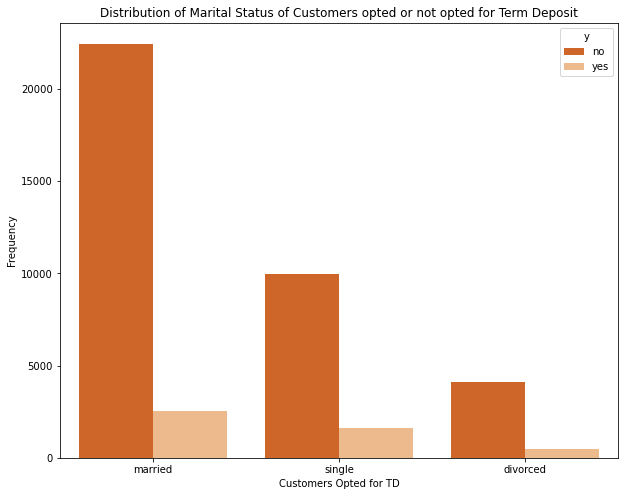

In [23]:
countp_y('marital', df)

plt.xlabel("Customers Opted for TD")
plt.ylabel("Frequency")
plt.title("Distribution of Marital Status of Customers opted or not opted for Term Deposit")
plt.show()

##### Distributing the 'marital' variable, it is evident that Married Customers had opted for TD most number of time. 
##### Also, Married Customers are the ones who had NOT opted for the Term Deposit. This may be because Number of Married Customers are more than Singles and Divorced.
##### Single Customers had opted for Term Deposit than Divoced Customers

#### Distribution of Job Column 

In [24]:
grpby('job')

job
admin.           10748
blue-collar       9252
entrepreneur      1456
housemaid         1060
management        2924
retired           1718
self-employed     1421
services          3967
student            875
technician        6739
unemployed        1014
Name: job, dtype: int64

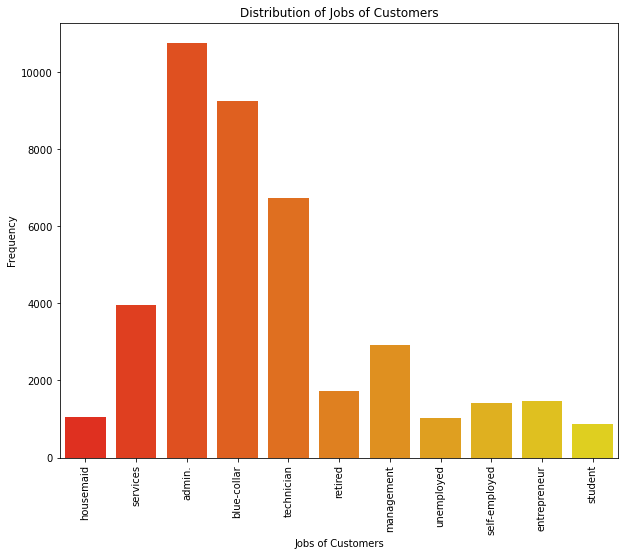

In [25]:
countp("job", df)

plt.xticks(rotation = 90)
plt.xlabel("Jobs of Customers")
plt.ylabel("Frequency")
plt.title("Distribution of Jobs of Customers")

plt.show()

##### From the distribution it is evident that most of the customers have jobs of "admin", "blue-collar" or "technician". 

In [26]:
grpby_y('job')

job            y  
admin.         no     9360
               yes    1388
blue-collar    no     8614
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1284
               yes     434
self-employed  no     1272
               yes     149
services       no     3644
               yes     323
student        no      600
               yes     275
technician     no     6009
               yes     730
unemployed     no      870
               yes     144
Name: job, dtype: int64

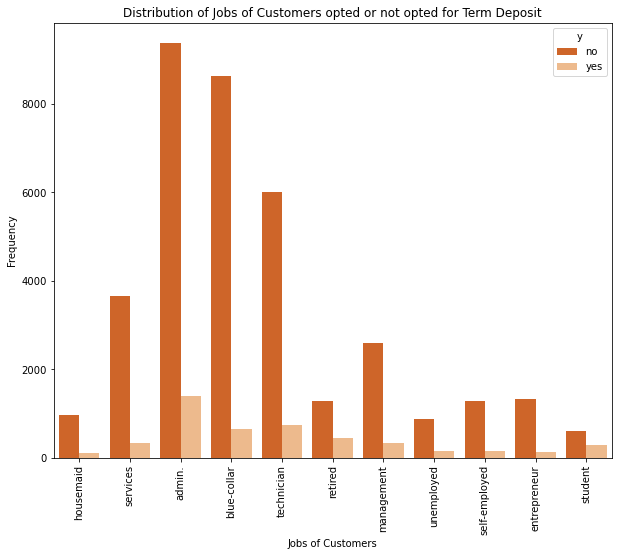

In [27]:
countp_y("job", df)

plt.xticks(rotation = 90)
plt.xlabel("Jobs of Customers")
plt.ylabel("Frequency")
plt.title("Distribution of Jobs of Customers opted or not opted for Term Deposit")

plt.show()

##### From the above plot, it is evident that the customers who having job of admin have the highest rate of subscribing a term deposit. Also they are also the highest in not taking the Term Deposit. This is maybe because admin class constitute most of our data in job variable.

##### From the Top 3 classes of 'job' variable, blue-collar class has more number of Customers not subscribing than technician class but techincian class has more number of Customers than blue-collar class

#### Distribution of Education Column 

In [28]:
grpby('education')

education
basic.4y                4175
basic.6y                2291
basic.9y                6045
high.school             9512
illiterate                18
professional.course     5240
university.degree      13893
Name: education, dtype: int64

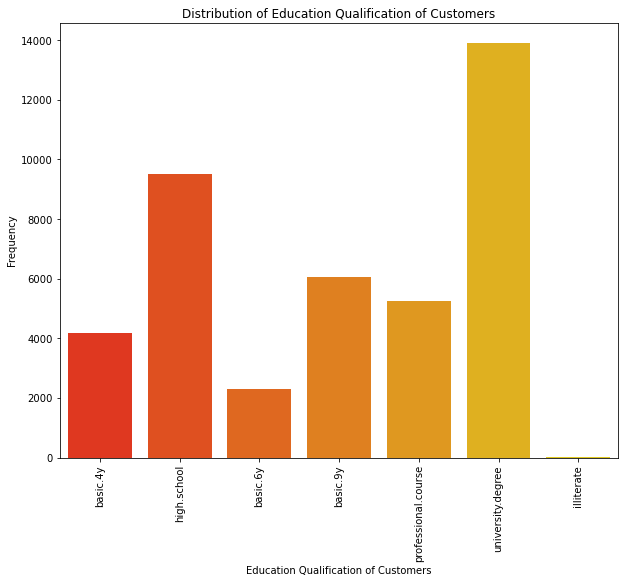

In [29]:
countp('education', df)

plt.xticks(rotation = 90)
plt.xlabel("Education Qualification of Customers")
plt.ylabel("Frequency")
plt.title("Distribution of Education Qualification of Customers")

plt.show()

##### From the above plot, most of the Customers were holding an University Degree.
##### Then comes the High school attended Customers
##### There are negligible number of Illeterate Customers

In [30]:
grpby_y('education')

education            y  
basic.4y             no      3747
                     yes      428
basic.6y             no      2103
                     yes      188
basic.9y             no      5572
                     yes      473
high.school          no      8481
                     yes     1031
illiterate           no        14
                     yes        4
professional.course  no      4645
                     yes      595
university.degree    no     11973
                     yes     1920
Name: education, dtype: int64

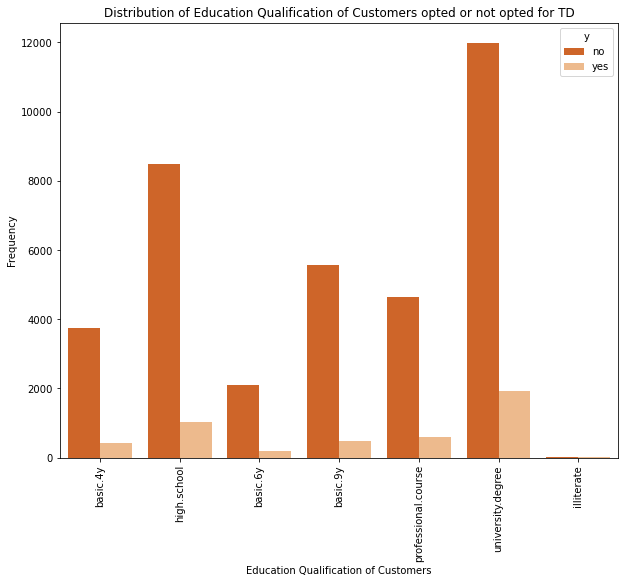

In [31]:
countp_y('education', df)

plt.xticks(rotation = 90)
plt.xlabel("Education Qualification of Customers")
plt.ylabel("Frequency")
plt.title("Distribution of Education Qualification of Customers opted or not opted for TD")

plt.show()

##### Customers holding an University Degree has opted for TD most than other classes of 'education' variable
##### Number of Customers having Education Qualification of basic 9y and those having professional course are almost same, but more number of Professional Course holders have opted for TD while more number of Basic 9y Customers hadd declined the TD

#### Distribution of Contact Column

In [32]:
grpby('contact')

contact
cellular     26134
telephone    15040
Name: contact, dtype: int64

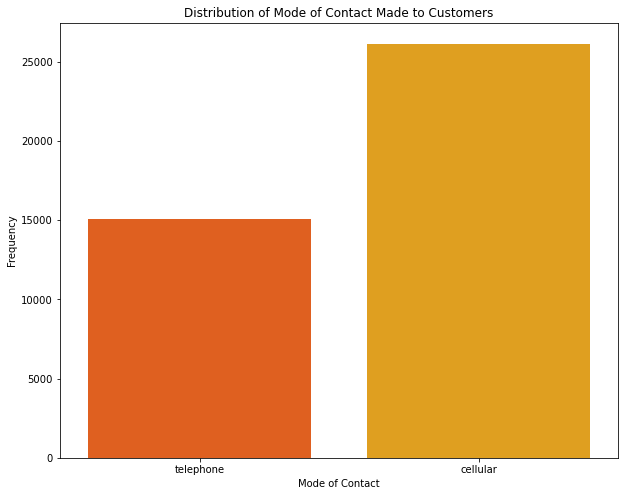

In [33]:
countp('contact', df)

plt.xlabel("Mode of Contact")
plt.ylabel("Frequency")
plt.title("Distribution of Mode of Contact Made to Customers")

plt.show()

##### More number of Customers were contacted on Cellular Phone than on telephone

In [34]:
grpby_y('contact')

contact    y  
cellular   no     22282
           yes     3852
telephone  no     14253
           yes      787
Name: contact, dtype: int64

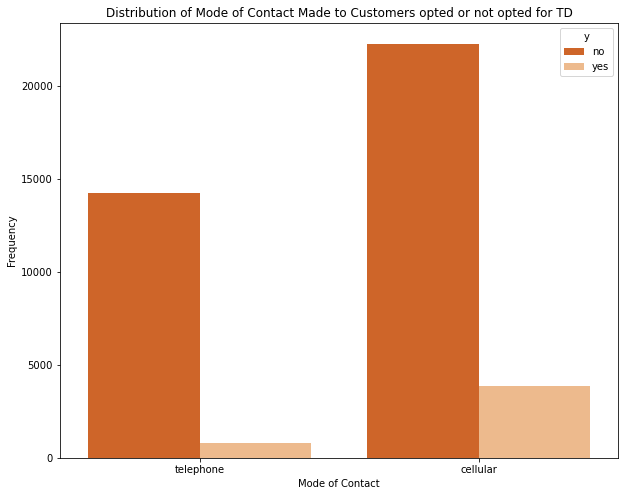

In [35]:
countp_y('contact', df)

plt.xlabel("Mode of Contact")
plt.ylabel("Frequency")
plt.title("Distribution of Mode of Contact Made to Customers opted or not opted for TD")

plt.show()

##### Customers contacted on Cellular Phone shown more success rate (~17%) for opting the TD than those contacted through Telephone(~ 5%)

#### Distribution of Loan Column

In [36]:
grpby('loan')

loan
no     34926
yes     6248
Name: loan, dtype: int64

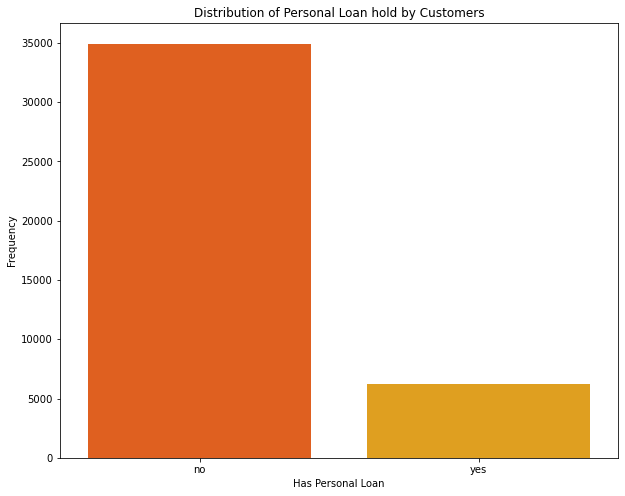

In [37]:
countp('loan', df)

plt.xlabel("Has Personal Loan")
plt.ylabel("Frequency")
plt.title("Distribution of Personal Loan hold by Customers")

plt.show()

##### Most of the Customers in survey were not having any Personal Loan

In [38]:
grpby_y('loan')

loan  y  
no    no     30970
      yes     3956
yes   no      5565
      yes      683
Name: loan, dtype: int64

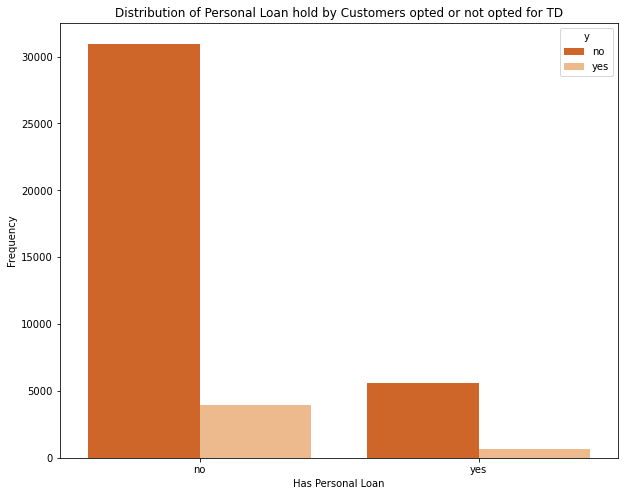

In [39]:
countp_y('loan', df)


plt.xlabel("Has Personal Loan")
plt.ylabel("Frequency")
plt.title("Distribution of Personal Loan hold by Customers opted or not opted for TD")

plt.show()

##### More number of people had opted for TD had no Perosnal Load simply because most of the people were not having Personal Loan

#### Distribution of Housing Loan Column

In [40]:
grpby('housing')

housing
no     19109
yes    22065
Name: housing, dtype: int64

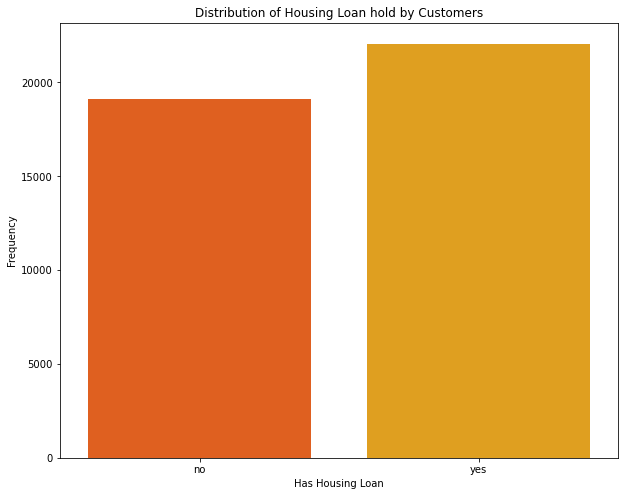

In [41]:
countp('housing', df)

plt.xlabel("Has Housing Loan")
plt.ylabel("Frequency")
plt.title("Distribution of Housing Loan hold by Customers")

plt.show()

In [42]:
grpby_y('housing')

housing  y  
no       no     16988
         yes     2121
yes      no     19547
         yes     2518
Name: housing, dtype: int64

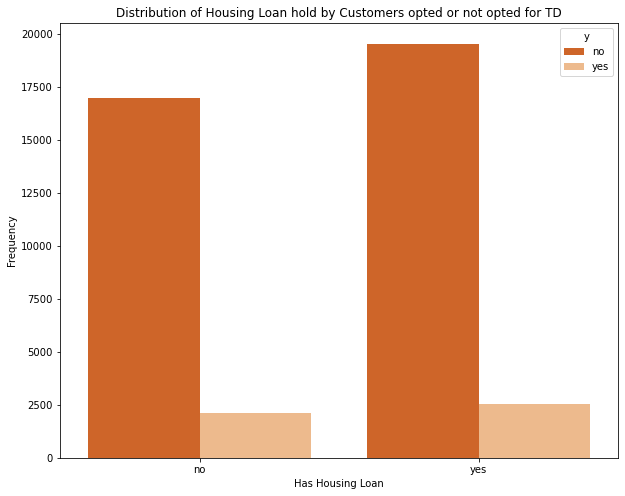

In [43]:
countp_y('housing', df)

plt.xlabel("Has Housing Loan")
plt.ylabel("Frequency")
plt.title("Distribution of Housing Loan hold by Customers opted or not opted for TD")
plt.show()

#### Distribution of Default Column

In [44]:
grpby('default')

default
no     41171
yes        3
Name: default, dtype: int64

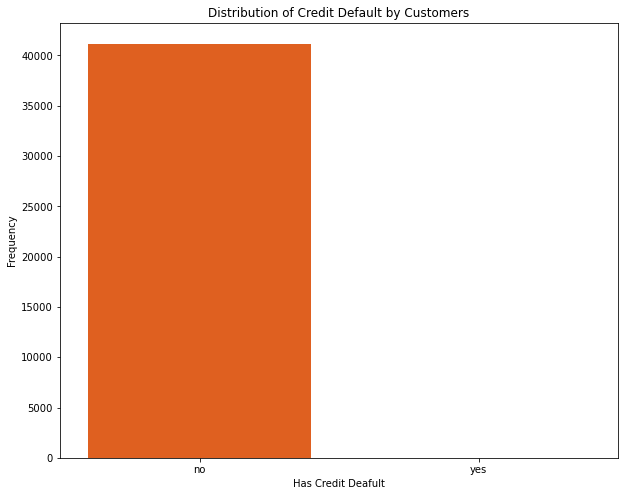

In [45]:
countp('default', df)

plt.xlabel("Has Credit Deafult")
plt.ylabel("Frequency")
plt.title("Distribution of Credit Default by Customers")

plt.show()

##### There were negligible Customers who had Credit Default 

In [46]:
grpby_y('default')

default  y  
no       no     36532
         yes     4639
yes      no         3
Name: default, dtype: int64

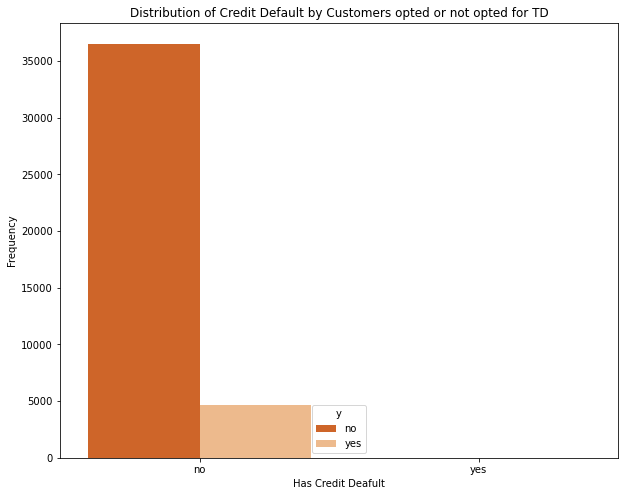

In [47]:
countp_y('default', df)


plt.xlabel("Has Credit Deafult")
plt.ylabel("Frequency")
plt.title("Distribution of Credit Default by Customers opted or not opted for TD")

plt.show()

##### Out of People having Credit Default, none of them opted for Term Deposit

#### Distribution of Month Column

In [48]:
grpby('month').sort_values()

month
dec      182
mar      546
sep      570
oct      717
apr     2631
nov     4100
jun     5318
aug     6175
jul     7169
may    13766
Name: month, dtype: int64

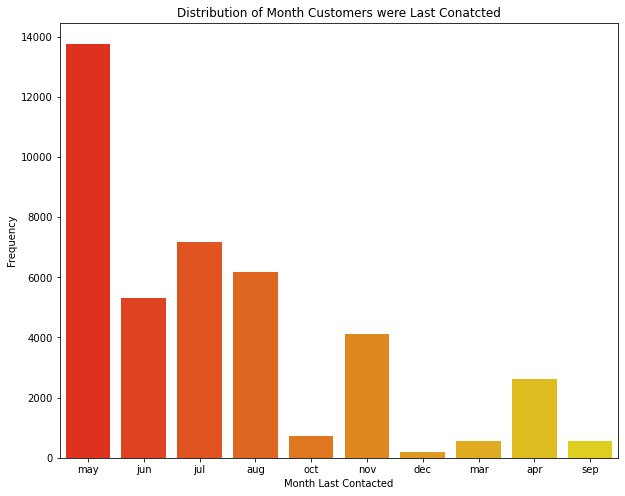

In [49]:
countp('month', df)

plt.xlabel("Month Last Contacted")
plt.ylabel("Frequency")
plt.title("Distribution of Month Customers were Last Conatcted")

plt.show()

##### Most of the Customers were last contacted in May
##### Least Number of Customers were last contacted in December
##### The Customres have been contacted strating from May and as we move towards end of year, the Number of Customers contacted deacreased
##### A sudden hike is seen in the November
##### No customers were last contacted in January or February

In [50]:
grpby_y('month')

month  y  
apr    no      2092
       yes      539
aug    no      5520
       yes      655
dec    no        93
       yes       89
jul    no      6521
       yes      648
jun    no      4759
       yes      559
mar    no       270
       yes      276
may    no     12880
       yes      886
nov    no      3684
       yes      416
oct    no       402
       yes      315
sep    no       314
       yes      256
Name: month, dtype: int64

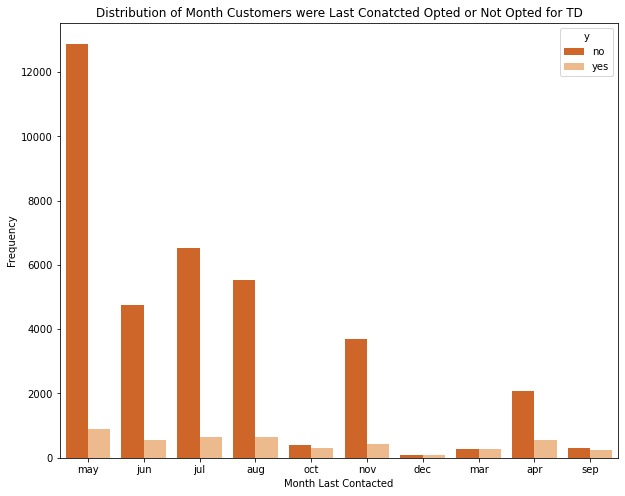

In [51]:
countp_y('month', df)

plt.xlabel("Month Last Contacted")
plt.ylabel("Frequency")
plt.title("Distribution of Month Customers were Last Conatcted Opted or Not Opted for TD")

plt.show()

#### Distribution of Day of Week Column

In [52]:
grpby('day_of_week')

day_of_week
fri    7826
mon    8511
thu    8617
tue    8086
wed    8134
Name: day_of_week, dtype: int64

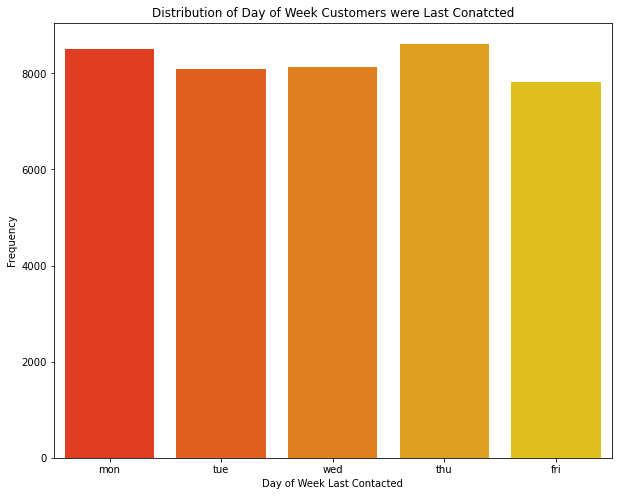

In [53]:
countp('day_of_week', df)

plt.xlabel("Day of Week Last Contacted")
plt.ylabel("Frequency")
plt.title("Distribution of Day of Week Customers were Last Conatcted")

plt.show()

##### Almost every working day (Monday to Friday) equal number of people were last contacted
##### Most of the Customers were contacted last on Monday while Least number were contacted last on Friday

In [54]:
grpby_y('day_of_week')

day_of_week  y  
fri          no     6980
             yes     846
mon          no     7664
             yes     847
thu          no     7573
             yes    1044
tue          no     7133
             yes     953
wed          no     7185
             yes     949
Name: day_of_week, dtype: int64

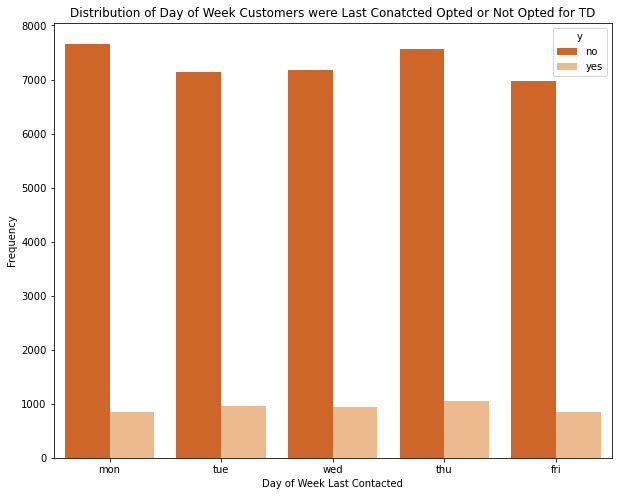

In [55]:
countp_y('day_of_week', df)

plt.xlabel("Day of Week Last Contacted")
plt.ylabel("Frequency")
plt.title("Distribution of Day of Week Customers were Last Conatcted Opted or Not Opted for TD")

plt.show()

#### Distributionof poutcome Column

In [56]:
grpby('poutcome')

poutcome
failure         4252
nonexistent    35549
success         1373
Name: poutcome, dtype: int64

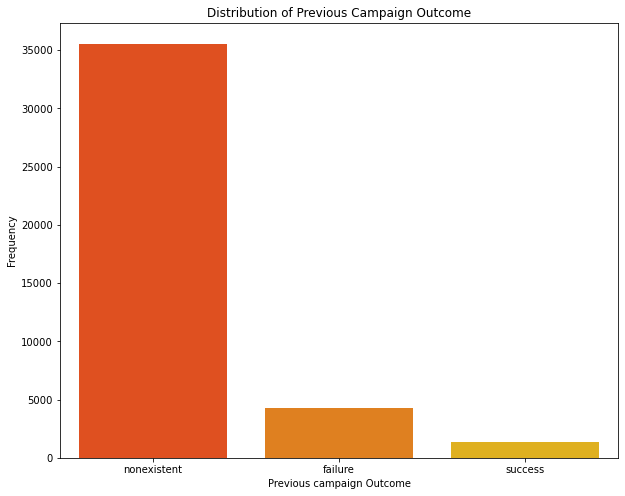

In [57]:
countp('poutcome', df)

plt.xlabel("Previous campaign Outcome")
plt.ylabel("Frequency")
plt.title("Distribution of Previous Campaign Outcome")

plt.show()

##### Most of the Customers were Non existent in Previous Marketing Campaign which shows most of the people were recently onboarded

In [58]:
grpby_y('poutcome')

poutcome     y  
failure      no      3647
             yes      605
nonexistent  no     32409
             yes     3140
success      no       479
             yes      894
Name: poutcome, dtype: int64

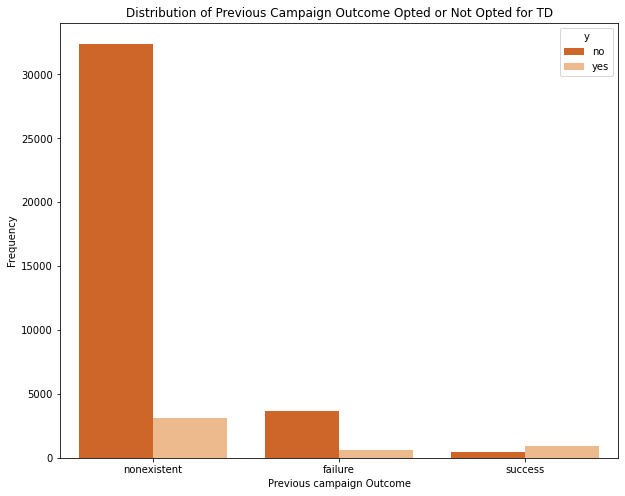

In [59]:
countp_y('poutcome', df)

plt.xlabel("Previous campaign Outcome")
plt.ylabel("Frequency")
plt.title("Distribution of Previous Campaign Outcome Opted or Not Opted for TD")

plt.show()

##### Customers which shown success in previous Campaign shown more interest in the current campaign
##### Little Number of New custoemrs also seem to be interested 

### Exploring Numeric Columns

In [60]:
#Function for distplot
def dist(x, data):
    plt.figure(figsize = (10,8))
    sns.distplot(data[x])

In [61]:
#Function for Box Plot of Classes of Target Variable 'y'
def box(x, data):
    plt.figure(figsize = (10,8))
    sns.boxplot(x = 'y', y = x, data = data)

#### Distribution of Age Column

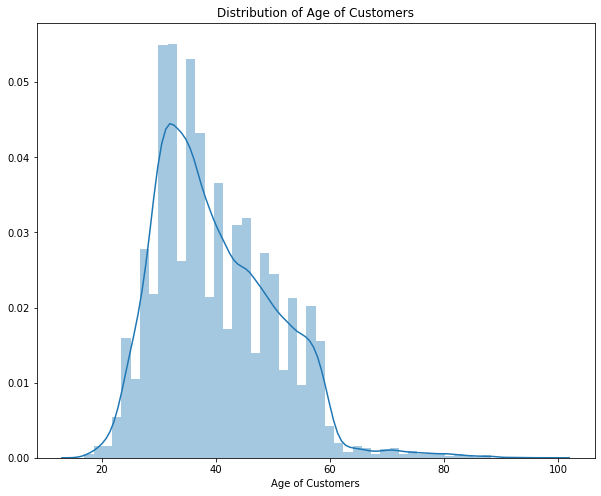

In [62]:
dist('age', df)

plt.xlabel("Age of Customers")

plt.title('Distribution of Age of Customers')
plt.show()

##### Most of the Customers age ranges between 30 to 40 years 

In [63]:
df['age'].describe()

count    41174.000000
mean        40.023583
std         10.420578
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

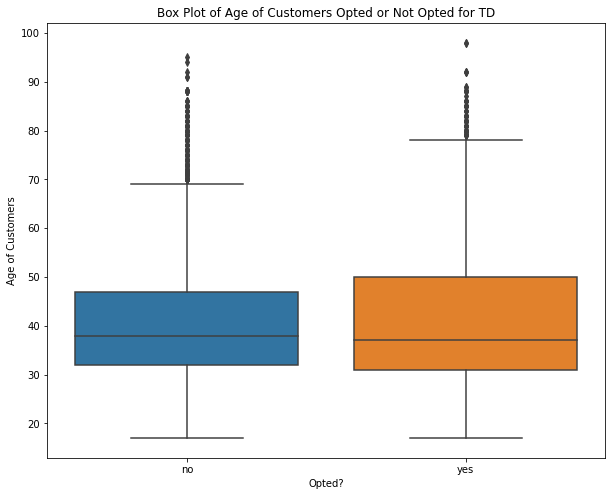

In [64]:
box('age', df)

plt.title('Box Plot of Age of Customers Opted or Not Opted for TD')
plt.xlabel("Opted?")
plt.ylabel("Age of Customers")
plt.show()

#### Distribution of Duration Column

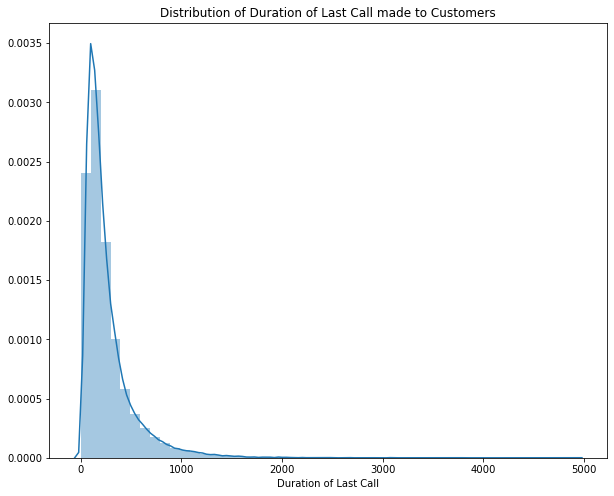

In [65]:
dist('duration', df)

plt.xlabel("Duration of Last Call")
plt.title('Distribution of Duration of Last Call made to Customers')
plt.show()

In [66]:
df['duration'].describe()

count    41174.000000
mean       258.323627
std        259.309058
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

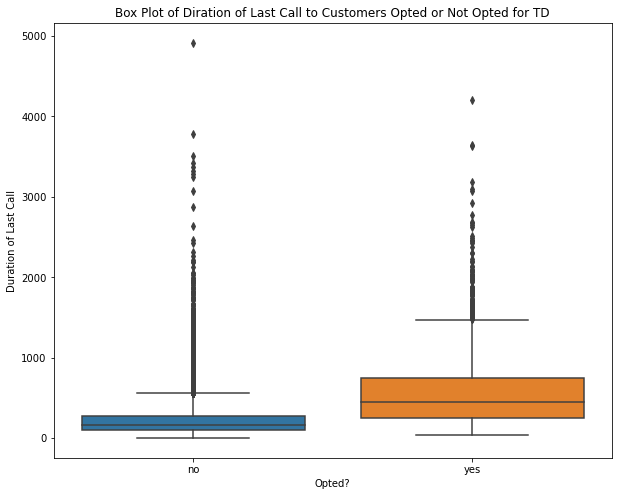

In [67]:
box('duration', df)

plt.title('Box Plot of Diration of Last Call to Customers Opted or Not Opted for TD')
plt.xlabel("Opted?")
plt.ylabel("Duration of Last Call")
plt.show()

##### It is evident that increase in Call Duration influenced the Decision for Opting the TD. Customers opted for TD had more duration of call.
##### There are outliers where call duration is very high still the Customer didnot opted for TD.

#### Distribution of Campaign

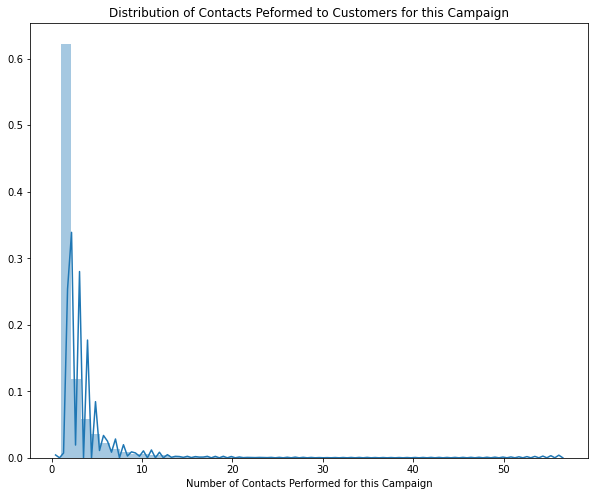

In [68]:
dist('campaign', df)

plt.xlabel("Number of Contacts Performed for this Campaign")
plt.title('Distribution of Contacts Peformed to Customers for this Campaign')
plt.show()

##### Most of Customers were contacted less than 5 times

In [69]:
df['campaign'].describe()

count    41174.000000
mean         2.567956
std          2.770364
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

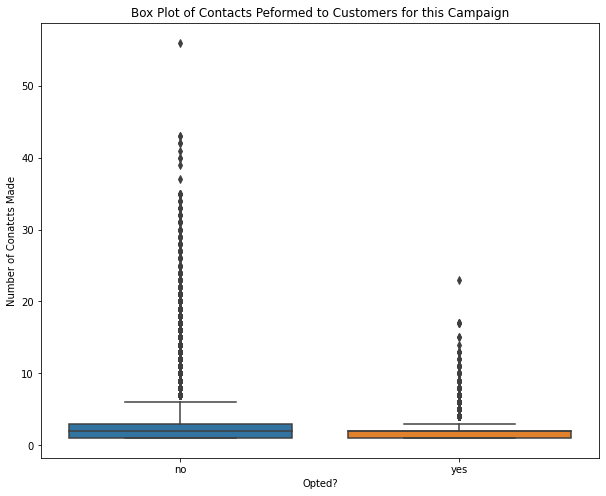

In [70]:
box('campaign', df)

plt.xlabel("Opted?")
plt.ylabel("Number of Conatcts Made")
plt.title('Box Plot of Contacts Peformed to Customers for this Campaign')

plt.show()

##### More number of contacts lead to Negative Impact and Customers did not opted TD

#### Distribution of pdays Column

In [71]:
grpby('pdays')

pdays
0.0         15
1.0         26
2.0         61
3.0        439
4.0        118
5.0         46
6.0        412
7.0         60
8.0         18
9.0         64
10.0        52
11.0        28
12.0        58
13.0        36
14.0        20
15.0        24
16.0        11
17.0         8
18.0         7
19.0         3
20.0         1
21.0         2
22.0         3
25.0         1
26.0         1
27.0         1
999.0    39659
Name: pdays, dtype: int64

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


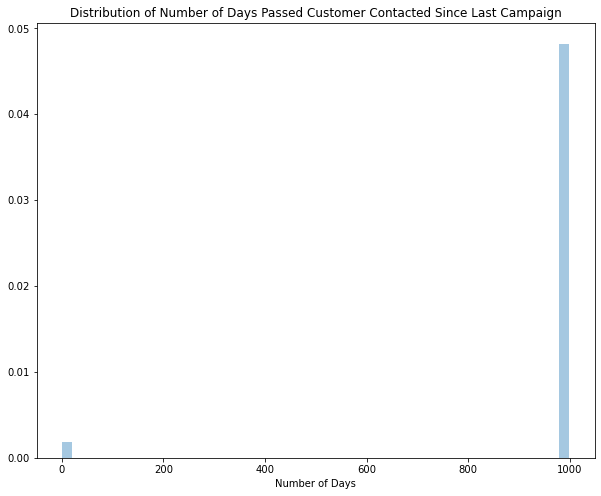

In [72]:
dist('pdays', df)

plt.xlabel("Number of Days")
plt.title('Distribution of Number of Days Passed Customer Contacted Since Last Campaign')
plt.show()

##### Maximum number of Customers were contacted 999 days after the lasst campaign which is because those customers are new and were not present in previous campaign.

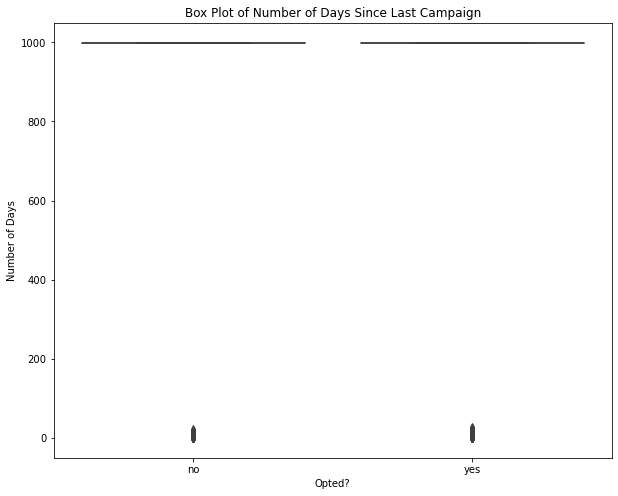

In [73]:
box('pdays', df)


plt.xlabel("Opted?")
plt.ylabel("Number of Days")
plt.title('Box Plot of Number of Days Since Last Campaign')

plt.show()

#### Distribution of Previous Column

In [74]:
grpby('previous')

previous
0.0    35549
1.0     4561
2.0      754
3.0      216
4.0       70
5.0       18
6.0        5
7.0        1
Name: previous, dtype: int64

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


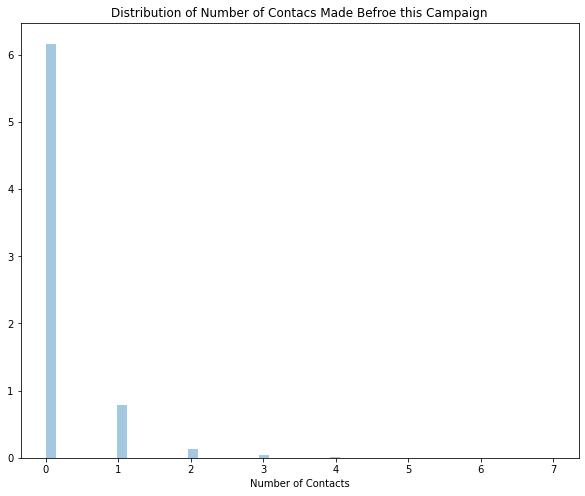

In [75]:
dist('previous', df)

plt.xlabel("Number of Contacts")
plt.title('Distribution of Number of Contacs Made Befroe this Campaign')

plt.show()

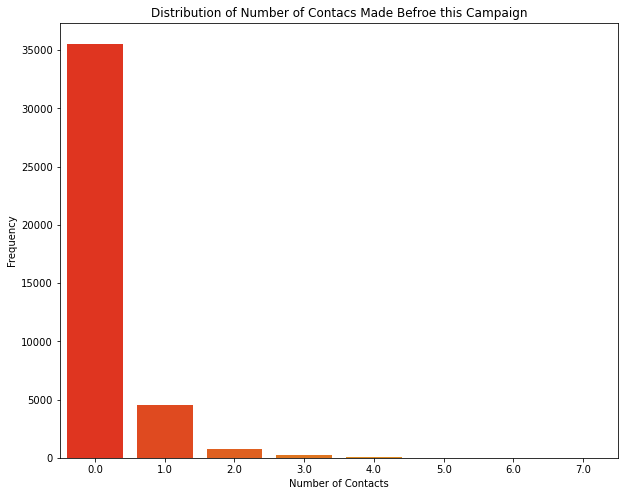

In [76]:
countp('previous', df)


plt.xlabel("Number of Contacts")
plt.ylabel("Frequency")
plt.title('Distribution of Number of Contacs Made Befroe this Campaign')

plt.show()

##### Most of the people were contacted 0 times before this campaign as Those Customers have just onboarded in this Bank

In [77]:
grpby_y('previous')

previous  y  
0.0       no     32409
          yes     3140
1.0       no      3594
          yes      967
2.0       no       404
          yes      350
3.0       no        88
          yes      128
4.0       no        32
          yes       38
5.0       no         5
          yes       13
6.0       no         2
          yes        3
7.0       no         1
Name: previous, dtype: int64

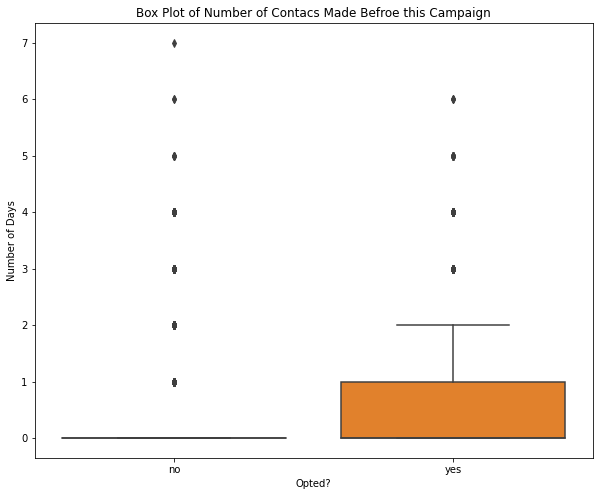

In [78]:
box('previous', df)

plt.xlabel("Opted?")
plt.ylabel("Number of Days")
plt.title('Box Plot of Number of Contacs Made Befroe this Campaign')

plt.show()

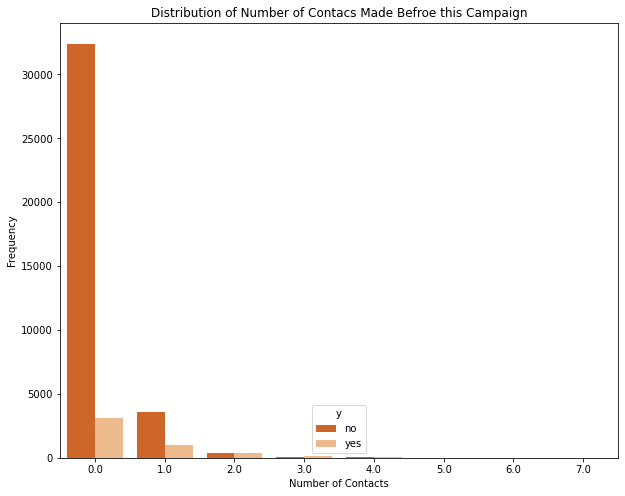

In [79]:
countp_y('previous', df)

plt.xlabel("Number of Contacts")
plt.ylabel("Frequency")
plt.title('Distribution of Number of Contacs Made Befroe this Campaign')

plt.show()

##### Most of the people opted for TD were not contacted before and had been contacted for the first time in this campaign

### Distribution of emp.var.rate Column

In [80]:
grpby('emp.var.rate')

emp.var.rate
-3.4     1070
-3.0      172
-2.9     1662
-1.8     9182
-1.7      773
-1.1      635
-0.2       10
-0.1     3682
 1.1     7761
 1.4    16227
Name: emp.var.rate, dtype: int64

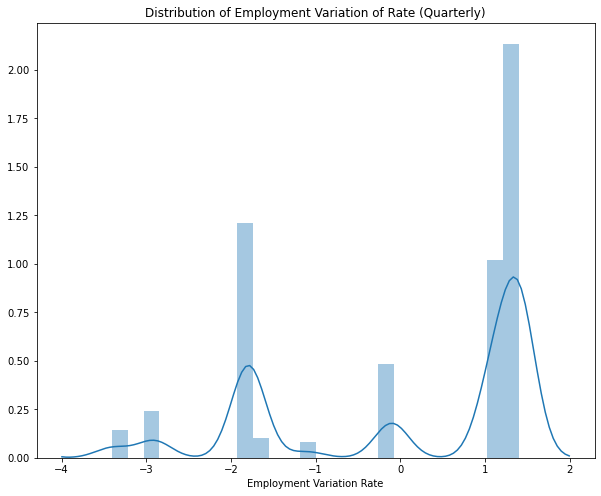

In [81]:
dist('emp.var.rate', df)

plt.xlabel("Employment Variation Rate")
plt.title('Distribution of Employment Variation of Rate (Quarterly)')

plt.show()

In [82]:
df['emp.var.rate'].describe()

count    41174.000000
mean         0.081865
std          1.570899
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

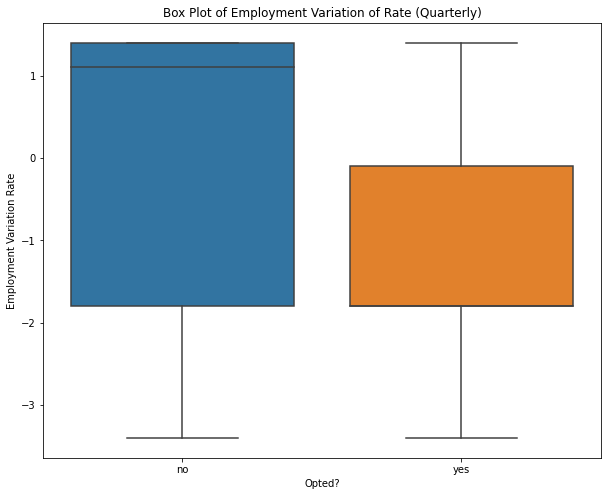

In [83]:
box('emp.var.rate', df)

plt.xlabel("Opted?")
plt.ylabel("Employment Variation Rate")
plt.title('Box Plot of Employment Variation of Rate (Quarterly)')

plt.show()

## Distribution of cons.price.idx

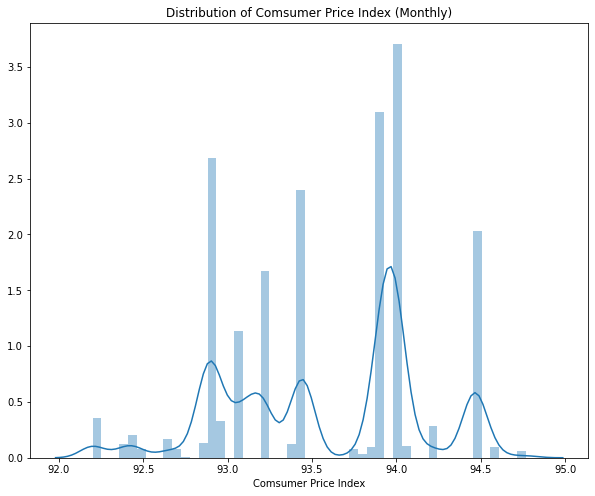

In [84]:
dist('cons.price.idx', df)

plt.xlabel("Comsumer Price Index")
plt.title('Distribution of Comsumer Price Index (Monthly)')

plt.show()

In [85]:
df['cons.price.idx'].describe()

count    41174.000000
mean        93.575713
std          0.578849
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

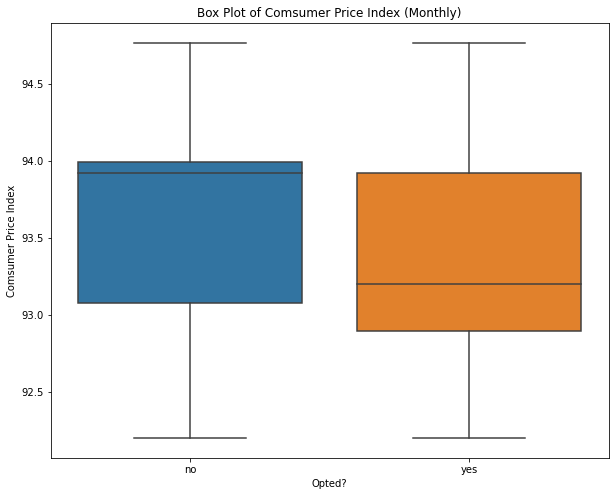

In [86]:
box('cons.price.idx', df)

plt.xlabel("Opted?")
plt.ylabel("Comsumer Price Index")
plt.title('Box Plot of Comsumer Price Index (Monthly)')

plt.show()

## Distribution of cons.conf.idx

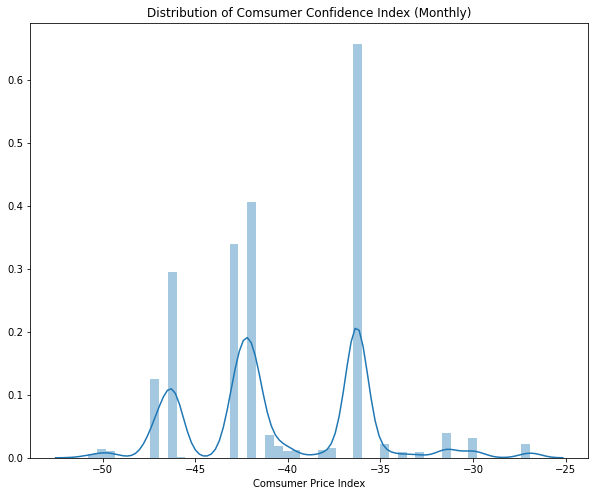

In [87]:
dist('cons.conf.idx', df)

plt.xlabel("Comsumer Price Index")
plt.title('Distribution of Comsumer Confidence Index (Monthly)')

plt.show()

In [88]:
df['cons.conf.idx'].describe()

count    41174.000000
mean       -40.503070
std          4.627877
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

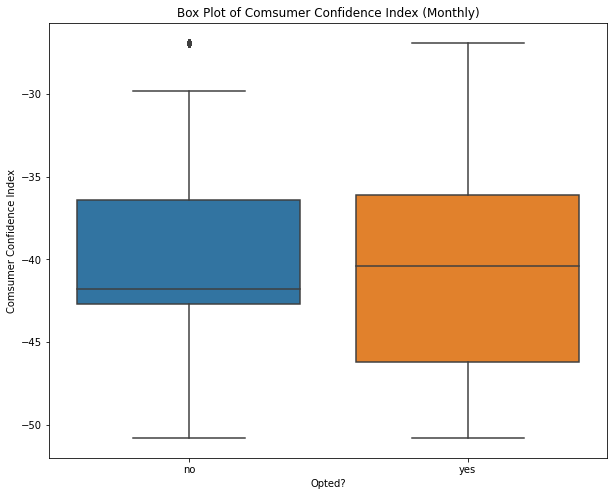

In [89]:
box('cons.conf.idx', df)

plt.xlabel("Opted?")
plt.ylabel("Comsumer Confidence Index")
plt.title('Box Plot of Comsumer Confidence Index (Monthly)')

plt.show()

## Distribution of euribor3m

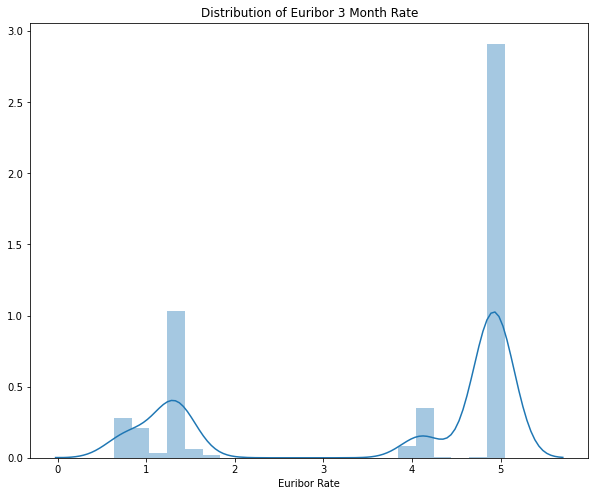

In [90]:
dist('euribor3m', df)

plt.xlabel("Euribor Rate")
plt.title('Distribution of Euribor 3 Month Rate')

plt.show()

In [91]:
df['euribor3m'].describe()

count    41174.000000
mean         3.621231
std          1.734456
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

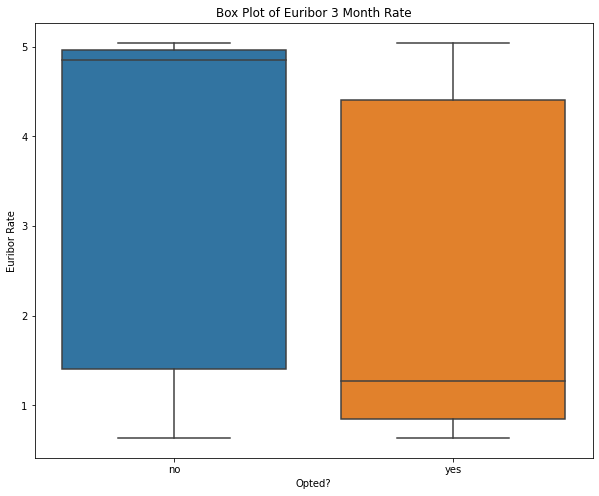

In [92]:
box('euribor3m', df)

plt.xlabel("Opted?")
plt.ylabel("Euribor Rate")
plt.title('Box Plot of Euribor 3 Month Rate')

plt.show()

## Distribution of nr.employed

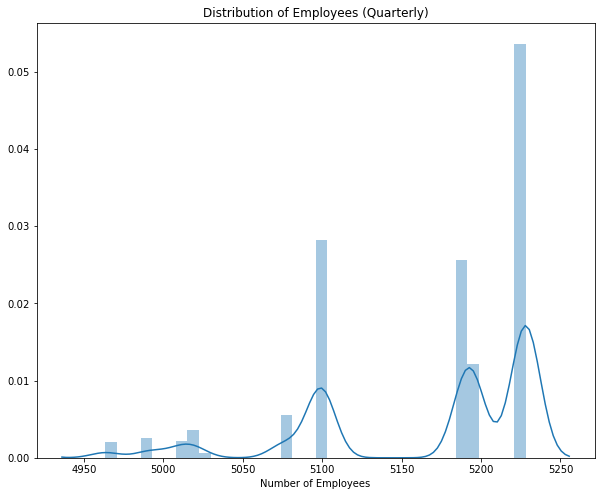

In [93]:
dist('nr.employed', df)

plt.xlabel("Number of Employees")
plt.title('Distribution of Employees (Quarterly)')

plt.show()

In [94]:
df['nr.employed'].describe()

count    41174.000000
mean      5167.032805
std         72.252395
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

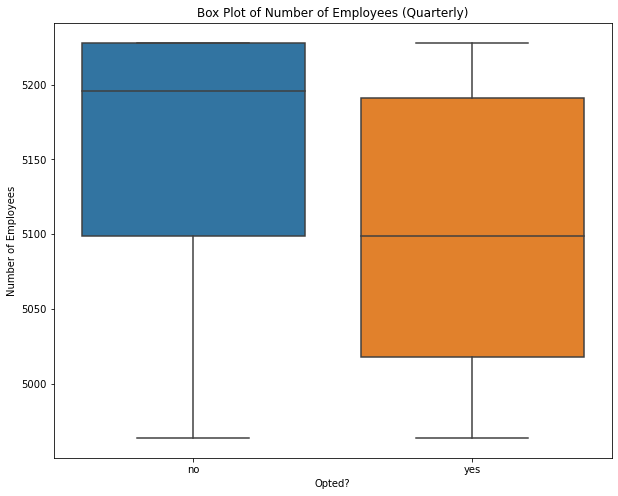

In [95]:
box("nr.employed", df)

plt.xlabel("Opted?")
plt.ylabel("Number of Employees")
plt.title('Box Plot of Number of Employees (Quarterly)')

plt.show()

## Correlation Matrix of Numeric Variables

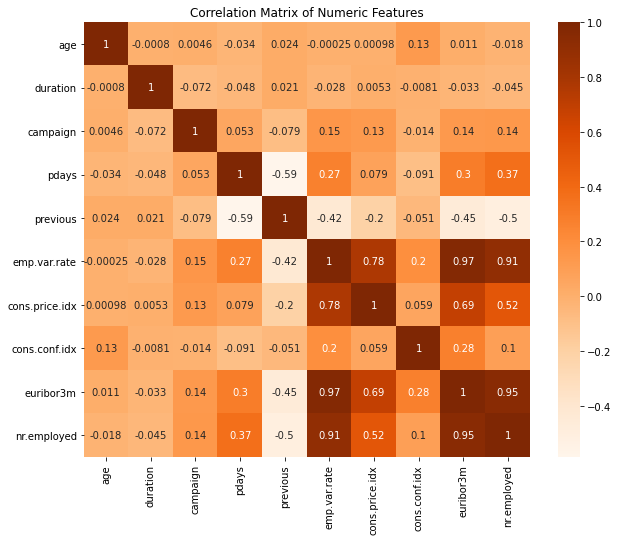

In [97]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), cmap = "Oranges", annot = True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

##### eurobor3m column shows much higher rate of correlation with emp.var.rate and nr.employed
##### emp.var.rate shows high rate of correlation with nr.employed
##### Age was least correlated with any of the column
##### Duration also was poorly correalted with any toher column

___

## Top 10 Conclusions Drawn from the Data

1. Most of the Customers opted for TD were Married beacuase most of the Customers taken into consideration were Married.
    * Suggestion - Thus, Bank can introduce offers and schemes for Students and Divorced Customers to achieve success.
2. From the Top 3 classes of 'job' variable, blue-collar class has more number of Customers not subscribing to TD than technician class but techincian class has more number of Customers opting for TD than blue-collar class.
    * Suggestion Bank can introduce offers to Students, as Student class shown a positive response among those contacted.
3. Number of Customers having Education Qualification of basic 9y and professional course are almost same, but more number of Professional Course holders have opted for TD while more number of Basic 9y Customers hadd declined the TD.
    * Suggestion - Bank cna work upon Basic 9y Education Customers to increase the succes rate. Also, can work upon the High School Customers as they show poor performance for opting TD in comparision to total number of High School Customers
4. People having Personal Loan did not shown much interest in TD, while Customers not having any Personal Loan shown a good response.
    * Suggestion - Bank can introduce better deposit options like Monthly or Bi-weekly so that Loan Holders can spend on Term Deposit
5. People having Credit Default did not opted for Term Deposit as they would have instead paid their Loan
6. Distribution of poutcome shows that most of the people were non existent during the last Campaign and showed good response for TD than thsoe already present in previous Campaign. These customers have just onboarded in this Bank.
    * Suggestion - Bank can provide welcome offers to these new customers to attracct towards TD and other offers.
7. Duration of Call can result in Positive otcome of this campaign.
8. More number of calls for the current campaign resulted in a Negative outcome
    * Suggestion - Bank should focus on implementing Lesser number of calls but longer duration of call, as it would save from negative impact and would convincing the customers.
9. Number of calls placed for previous campaign is 0 for most of the custoemrs ass these customers have just joined the Bank. Also, Number of days since last contacted from previous campaign is 999 for most of the custoemrs which shows that these customers were contacted 999 days ago or NEVER CONTACTED before as they have just joined. 
    * Suggestion - Bank cna bring new joining offers.
10. Most of the people were having age in range of 30 to 40.